#1. Habilitar Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Importar Librerías

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#3. Cargar Clasificador Haar

In [0]:
face_cascade= cv2.CascadeClassifier('/content/drive/My Drive/Computer_Vision/Python_files/HaarCascade/haarcascade_fullbody.xml');
img = cv2.imread("/content/drive/My Drive/Computer_Vision/Images/personas.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#4. Identificar Cuerpos en la Imágen

In [0]:
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
print(faces)

[[ 68 101 171 342]
 [233  83 180 359]
 [398 100 165 329]]


#5. Rectángulos Verdes

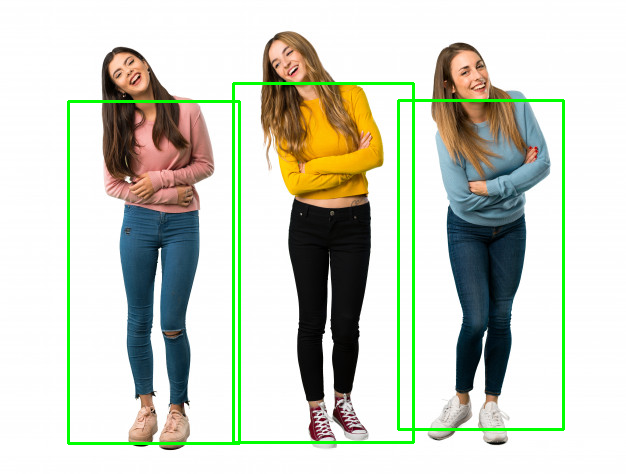

In [0]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2_imshow(img)   

#6. Código Completo Enumerado

[[ 55  55 193 386]
 [223  60 193 386]
 [380  59 193 386]]


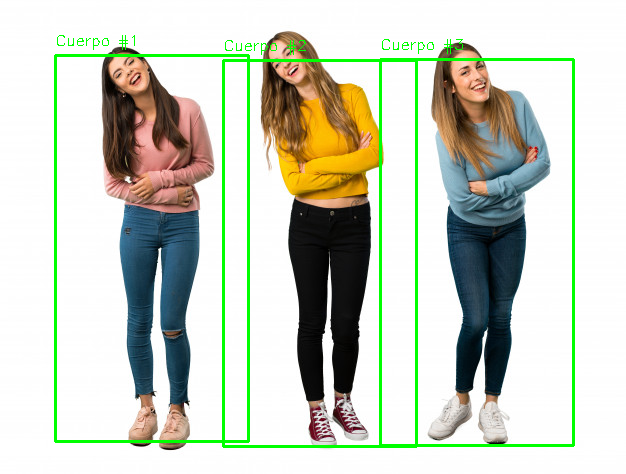

True

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Computer_Vision/Python_files/HaarCascade/haarcascade_fullbody.xml');
img = cv2.imread("/content/drive/My Drive/Computer_Vision/Images/personas.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,2);
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  idx += 1
  cv2.putText(img,"Cuerpo #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
cv2.imwrite('/content/drive/My Drive/Computer_Vision/Images/cuerpos_detectados.jpg',img)

#Video

In [0]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/My Drive/Computer_Vision/Images/corriendo.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

##Cargar Video Con Opencv

In [0]:
videoentrada = cv2.VideoCapture('/content/drive/My Drive/Computer_Vision/Images/corriendo.mp4')
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(videoentrada, property_id))
print( "total de frames: "+str(totalframes) )
print(str(videoentrada.get(3))+"x"+str(videoentrada.get(4))+" pixeles")

total de frames: 238
1280.0x720.0 pixeles


##Extrayendo Solo Unos Frames

In [0]:
#recorremos los 6 primeros frames de 238
for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  cv2_imshow(frame)

##Recorriendo Todo el Video

In [0]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Computer_Vision/Python_files/HaarCascade/haarcascade_fullbody.xml')
while(videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    # Nuestras operaciones sobre los frames se hacen aqui
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detectamos los cuerpos en el frame
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x, y, w, h) in faces:
      #dibujamos rectángulos verdes alrededor de los cuerpos
      cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
    cv2_imshow(frame)
  else:
    break  
videoentrada.release()

Output hidden; open in https://colab.research.google.com to view.

##Exportar Video Con Cuerpos

In [0]:
pip install pyprind

In [0]:
import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r %d frames | %d segundos transcurrido" %
                    (percent, duration))
    sys.stdout.flush()

In [0]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Computer_Vision/Python_files/HaarCascade/haarcascade_fullbody.xml')
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/My Drive/Computer_Vision/Images/corriendo.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
videosalida = cv2.VideoWriter('/content/drive/My Drive/Computer_Vision/Images/corriendo_haar2.avi',
                              codec, 20.0,(1280,720))
framenum=0
while (videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    videosalida.write(frame)
    reporthook(framenum, 238)
    framenum=framenum+1
  else: break
videoentrada.release()
videosalida.release()

 99 frames | 146 segundos transcurrido